Product-wise Sales Summary:

    product     category  total_qty  revenue
0  Keyboard  Electronics         11    440.0
1    Laptop  Electronics          8   5600.0
2     Mouse  Electronics         15    375.0


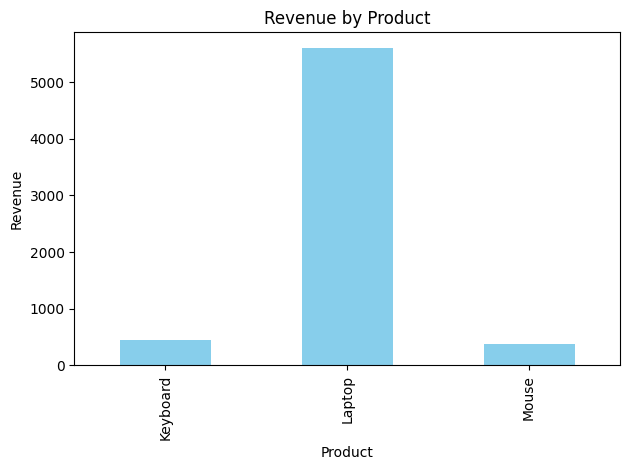

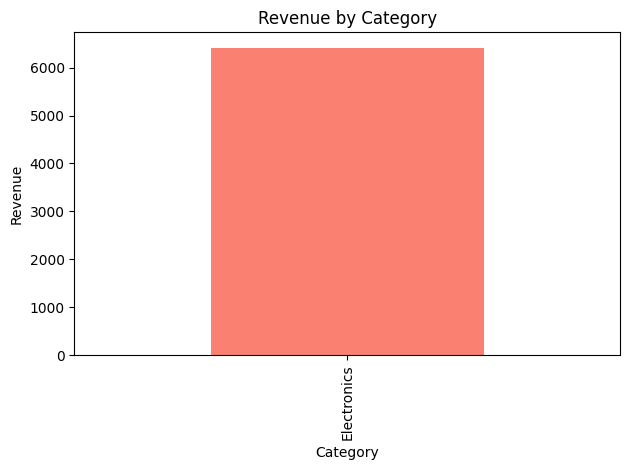

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Step 2: Create sales table with Category
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    category TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Step 3: Insert sample data if empty
cursor.execute("SELECT COUNT(*) FROM sales")
if cursor.fetchone()[0] == 0:
    sample_data = [
        ("Laptop", "Electronics", 5, 700),
        ("Mouse", "Electronics", 10, 25),
        ("Keyboard", "Electronics", 7, 40),
        ("Laptop", "Electronics", 3, 700),
        ("Mouse", "Electronics", 5, 25),
        ("Keyboard", "Electronics", 4, 40),
    ]
    cursor.executemany("INSERT INTO sales (product, category, quantity, price) VALUES (?, ?, ?, ?)", sample_data)
    conn.commit()

# Step 4: Run SQL query
query = """
SELECT product, category, SUM(quantity) AS total_qty, SUM(quantity * price) AS revenue
FROM sales
GROUP BY product, category
"""

# Step 5: Load results into pandas DataFrame
df = pd.read_sql_query(query, conn)

# Step 6: Print DataFrame
print("Product-wise Sales Summary:\n")
print(df)

# Step 7: Plot revenue by product
df.plot(kind='bar', x='product', y='revenue', color='skyblue', legend=False)
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.title("Revenue by Product")
plt.tight_layout()
plt.savefig("sales_chart_by_product.png")
plt.show()

# Step 8: Plot revenue by category
category_df = df.groupby("category").sum(numeric_only=True).reset_index()
category_df.plot(kind='bar', x='category', y='revenue', color='salmon', legend=False)
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.title("Revenue by Category")
plt.tight_layout()
plt.savefig("sales_chart_by_category.png")
plt.show()

# Close connection
conn.close()